In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix
# from tensorflow.keras.models import Model
# import tensorflow as tf

In [2]:
df = pd.read_csv("logs.csv")
df

,epoch,accuracy,auc,fn,fp,loss,precision,recall,tn,tp,val_accuracy,val_auc,val_fn,val_fp,val_loss,val_precision,val_recall,val_tn,val_tp
0,0,0.842239,0.919260,1543.0,1935.0,0.362210,0.830486,0.860020,9088.0,9480.0,0.901633,0.964312,101.0,170.0,0.249377,0.883641,0.927443,1193.0,1291.0
1,1,0.911095,0.963984,828.0,1132.0,0.234861,0.900062,0.924884,9891.0,10195.0,0.886025,0.940182,153.0,161.0,0.330867,0.885082,0.890165,1201.0,1240.0
2,2,0.932868,0.975928,626.0,854.0,0.188595,0.924116,0.943225,10166.0,10400.0,0.929583,0.968100,102.0,92.0,0.229820,0.933622,0.926934,1267.0,1294.0
3,3,0.945523,0.984349,511.0,690.0,0.151585,0.938415,0.953651,10331.0,10514.0,0.952450,0.984510,33.0,98.0,0.151936,0.932923,0.976361,1261.0,1363.0
4,4,0.952644,0.987450,445.0,599.0,0.133600,0.946408,0.959630,10424.0,10578.0,0.603993,0.910404,1035.0,56.0,0.616212,0.863747,0.255396,1309.0,355.0
5,5,0.955910,0.988235,387.0,585.0,0.127280,0.947880,0.964901,10435.0,10639.0,0.952813,0.987617,50.0,80.0,0.133465,0.943899,0.964183,1279.0,1346.0
6,6,0.962034,0.992514,336.0,501.0,0.102501,0.955220,0.969518,10522.0,10687.0,0.947368,0.985236,73.0,72.0,0.155465,0.948313,0.947633,1289.0,1321.0
7,7,0.974281,0.995585,230.0,337.0,0.074567,0.969721,0.979135,10686.0,10793.0,0.929583,0.984203,150.0,44.0,0.192491,0.965785,0.892241,1319.0,1242.0
8,8,0.975733,0.996301,208.0,327.0,0.069802,0.970657,0.981134,10694.0,10817.0,0.935390,0.979210,40.0,138.0,0.234321,0.907133,0.971182,1229.0,1348.0
9,9,0.981675,0.998393,173.0,231.0,0.049007,0.979152,0.984304,10793.0,10849.0,0.943013,0.977539,87.0,70.0,0.221612,0.948942,0.937320,1297.0,1301.0


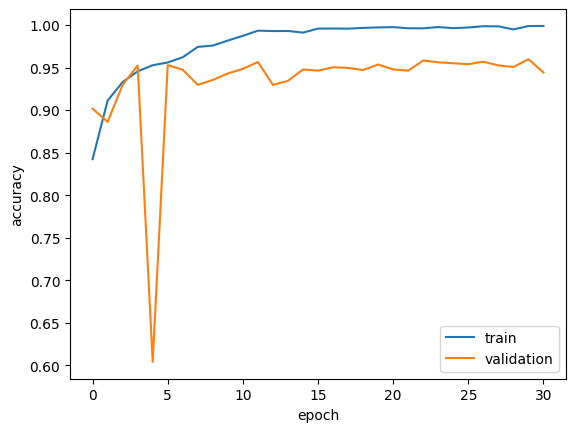

In [3]:
plt.figure()
plt.plot(df["accuracy"])
plt.plot(df["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"])
plt.show()

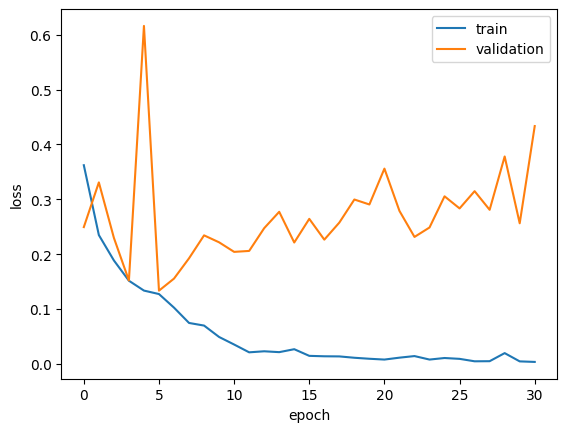

In [4]:
plt.figure()
plt.plot(df["loss"])
plt.plot(df["val_loss"])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"])
plt.show()

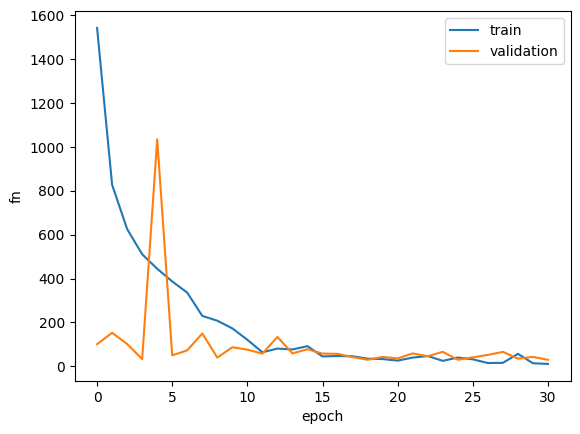

In [5]:
plt.figure()
plt.plot(df["fn"])
plt.plot(df["val_fn"])
plt.ylabel("fn")
plt.xlabel("epoch")
plt.legend(["train", "validation"])
plt.show()